# Бактыбекова Назима AIN-2-21 

## Лабораторная работа №5 load_linnerud()

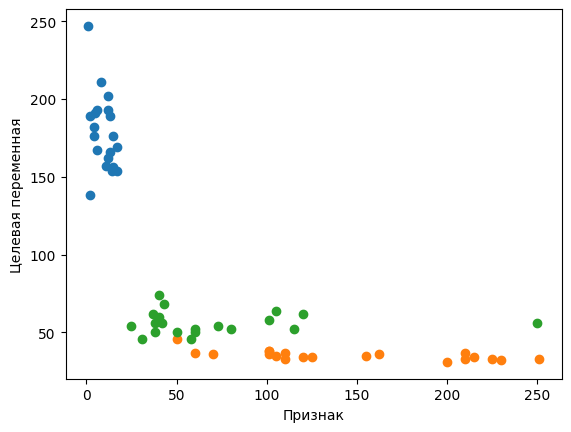

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
import numpy as np

# Загрузим набор данных "linnerud"
linnerud = load_linnerud()

X = linnerud.data  # Признаки
y = linnerud.target  # Целевая переменная

# Построим график
plt.plot(X, y, 'o')
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

In [7]:
print("Ключи linnerud(): \n{}".format(linnerud.keys()))

Ключи linnerud(): 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [8]:
print("Форма массива data для набора linnerud: {}".format(linnerud.data.shape))

Форма массива data для набора linnerud: (20, 3)


In [20]:
# Выводим имена признаков из набора данных diabetes
print("Имена признаков:\n{}".format(linnerud.feature_names))

Имена признаков:
['Chins', 'Situps', 'Jumps']


### KNeighborsRegressor

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Создаем экземпляр модели K-ближайших соседей для регрессии и устанавливаем количество соседей равным 4
reg = KNeighborsRegressor(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(linnerud.data, linnerud.target, random_state=66)

# Подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [69]:
# Выполняем прогноз на тестовом наборе данных и выводим результат
predicted_values = reg.predict(X_test)
print("Прогноз для тестового набора:\n{}".format(predicted_values))

Прогноз для тестового набора:
[[171.25  34.75  58.5 ]
 [197.25  38.25  55.  ]
 [175.75  33.75  58.5 ]
 [171.25  34.75  58.5 ]
 [171.25  34.75  58.5 ]]


In [70]:
# Вычисляем и выводим R^2 на обучающем наборе данных
r2_train = reg.score(X_train, y_train)
print("R^2 на обучающем наборе: {:.2f}".format(r2_train))

# Вычисляем и выводим R^2 на тестовом наборе данных
r2_test = reg.score(X_test, y_test)
print("R^2 на тестовом наборе: {:.2f}".format(r2_test))

R^2 на обучающем наборе: 0.27
R^2 на тестовом наборе: -1.11


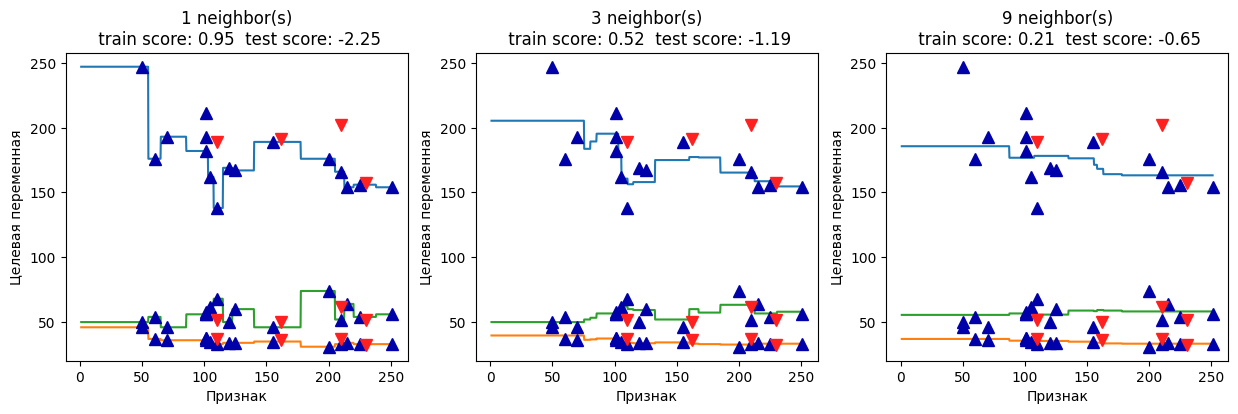

In [71]:
X = linnerud.data  
y = linnerud.target  

# Разделение данных на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбираем только один признак
X_train = X_train[:, 1].reshape(-1, 1)
X_test = X_test[:, 1].reshape(-1, 1)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Создаем 1000 точек данных, равномерно распределенных между минимальными и максимальными значениями признака
line = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # Создаем модель K-Nearest Neighbors регрессии с указанным количеством соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)

    # Строим предсказания модели на линии
    ax.plot(line, reg.predict(line))

    # Строим точки обучающих данных на графике (маркеры "^")
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)

    # Строим точки тестовых данных на графике (маркеры "v")
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    # Заголовок графика, отображающий количество соседей и оценку R^2 для обучающего и тестового наборов
    ax.set_title("{} neighbor(s)\n train score: {:.2f}  test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))

    # Подписываем ось X
    ax.set_xlabel("Признак")

    # Подписываем ось Y
    ax.set_ylabel("Целевая переменная")

plt.show()

### LinearRegression

In [72]:
# Импортируем модель линейной регрессии из scikit-learn
from sklearn.linear_model import LinearRegression

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(linnerud['data'], linnerud['target'], random_state=0)

# Создаем модель линейной регрессии и обучаем её на обучающих данных и ответах
lr = LinearRegression().fit(X_train, y_train)

In [73]:
# Выводим коэффициенты (веса) модели линейной регрессии
print("lr.coef_: {}".format(lr.coef_))

# Выводим свободный член (пересечение) модели линейной регрессии
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[-2.55388075e+00 -1.87334813e-01  1.55632934e-01]
 [-3.25317265e-01 -3.72155297e-02  3.22483661e-02]
 [ 4.66624875e-01 -3.84735037e-03 -2.35434971e-03]]
lr.intercept_: [221.27779424  41.8405461   51.37162613]


In [74]:
# Вычисляем и выводим коэффициент детерминации (R^2) на обучающем наборе данных
train_score = lr.score(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_score))

# Вычисляем и выводим коэффициент детерминации (R^2) на тестовом наборе данных
test_score = lr.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(test_score))

Правильность на обучающем наборе: 0.38
Правильность на тестовом наборе: -1.24


### Ridge

In [75]:
# Импортируем модель гребневой регрессии из scikit-learn
from sklearn.linear_model import Ridge

# Создаем модель гребневой регрессии и обучаем её на обучающих данных и ответах
ridge = Ridge().fit(X_train, y_train)

# Выводим коэффициент детерминации (R^2) на обучающем наборе данных
train_score = ridge.score(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_score))

# Выводим коэффициент детерминации (R^2) на тестовом наборе данных
test_score = ridge.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(test_score))

Правильность на обучающем наборе: 0.38
Правильность на тестовом наборе: -1.23


In [76]:
# Создаем модель гребневой регрессии с коэффициентом регуляризации alpha=10 и обучаем её на обучающих данных и ответах
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

# Выводим коэффициент детерминации (R^2) на обучающем наборе данных
train_score = ridge10.score(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_score))

# Выводим коэффициент детерминации (R^2) на тестовом наборе данных
test_score = ridge10.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(test_score))

Правильность на обучающем наборе: 0.38
Правильность на тестовом наборе: -1.13


In [77]:
# Создаем модель гребневой регрессии с коэффициентом регуляризации alpha=0.1 и обучаем её на обучающих данных и ответах
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# Выводим коэффициент детерминации (R^2) на обучающем наборе данных
train_score = ridge01.score(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(train_score))

# Выводим коэффициент детерминации (R^2) на тестовом наборе данных
test_score = ridge01.score(X_test, y_test)
print("Правильность на тестовом наборе: {:.2f}".format(test_score))

Правильность на обучающем наборе: 0.38
Правильность на тестовом наборе: -1.24


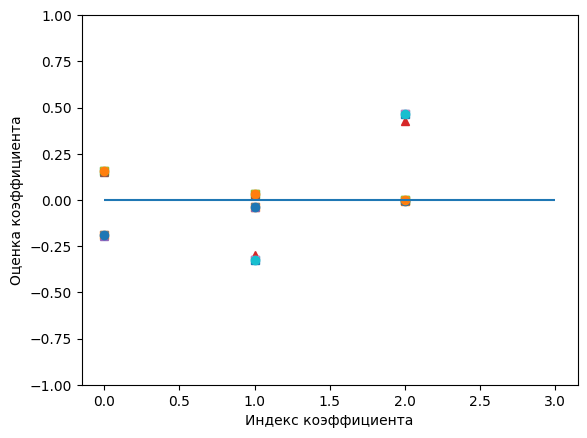

In [87]:
# Строим графики коэффициентов для разных моделей
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")

# Устанавливаем подпись для оси X
plt.xlabel("Индекс коэффициента")

# Устанавливаем подпись для оси Y
plt.ylabel("Оценка коэффициента")

# Рисуем горизонтальные линии на графике
plt.hlines(0, 0, len(lr.coef_))

# Устанавливаем ограничение по вертикальной оси Y
plt.ylim(-1, 1)

# Добавляем легенду к графику
# plt.legend()

# Отображаем графики
plt.show()

### Lasso

In [89]:
import numpy as np  
from sklearn.datasets import load_linnerud 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso  

# Загрузка данных load_linnerud()
linnerud = load_linnerud() 

X = linnerud.data  # Выделяем признаки 
y = linnerud.target  # Выделяем целевую переменную 

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Разделяем данные на обучающий (X_train, y_train) и тестовый (X_test, y_test) наборы.

# Создание и обучение модели Lasso с alpha=1.0 (по умолчанию)
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
# Создаем модель Lasso регрессии с коэффициентом регуляризации alpha=1.0 и обучаем её на обучающих данных.

# Оценка модели на обучающем и тестовом наборах
train_score = lasso.score(X_train, y_train)  # Оцениваем модель на обучающем наборе данных и получаем коэффициент детерминации.
test_score = lasso.score(X_test, y_test)  # Оцениваем модель на тестовом наборе данных и получаем коэффициент детерминации.

# Подсчет количества использованных признаков
used_features = np.sum(lasso.coef_ != 0)  # Считаем количество признаков, которые модель использовала в регрессии.

# Выводим результаты
print("Правильность на обучающем наборе: {:.2f}".format(train_score))  # Выводим коэффициент детерминации на обучающем наборе.
print("Правильность на тестовом наборе: {:.2f}".format(test_score))  # Выводим коэффициент детерминации на тестовом наборе.
print("Количество использованных признаков: {}".format(used_features))  # Выводим количество использованных признаков.

Правильность на обучающем наборе: 0.37
Правильность на тестовом наборе: -1.06
Количество использованных признаков: 8


In [90]:
# Создание и обучение модели Lasso с alpha=0.01 и увеличенным max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

# Оценка модели на обучающем и тестовом наборах
train_score = lasso001.score(X_train, y_train)
test_score = lasso001.score(X_test, y_test)

# Подсчет количества использованных признаков
used_features = np.sum(lasso001.coef_ != 0)

print("Правильность на обучающем наборе: {:.2f}".format(train_score))
print("Правильность на контрольном наборе: {:.2f}".format(test_score))
print("Количество использованных признаков: {}".format(used_features))

Правильность на обучающем наборе: 0.37
Правильность на контрольном наборе: -1.21
Количество использованных признаков: 9


In [91]:
# Создание и обучение модели Lasso с alpha=0.0001 и увеличенным max_iter
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

# Оценка модели на обучающем и тестовом наборах
train_score = lasso00001.score(X_train, y_train)
test_score = lasso00001.score(X_test, y_test)

# Подсчет количества использованных признаков
used_features = np.sum(lasso00001.coef_ != 0)

print("Правильность на обучающем наборе: {:.2f}".format(train_score))
print("Правильность на контрольном наборе: {:.2f}".format(test_score))
print("Количество использованных признаков: {}".format(used_features))

Правильность на обучающем наборе: 0.37
Правильность на контрольном наборе: -1.21
Количество использованных признаков: 9


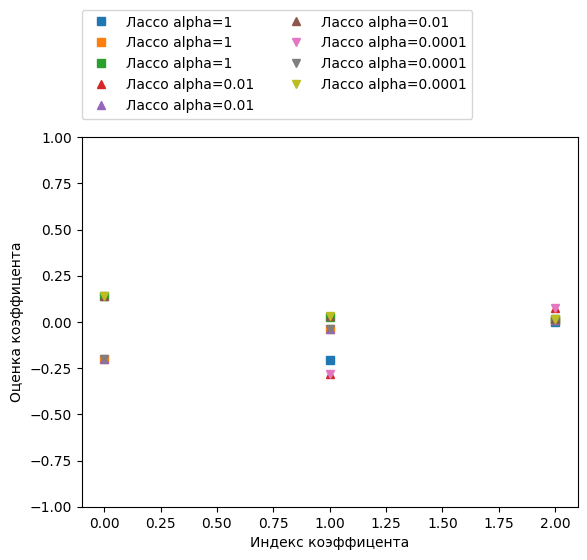

In [94]:
# Создание графика оценок коэффициентов для моделей Lasso с разными значениями alpha
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-1, 1)
plt.xlabel("Индекс коэффицента")
plt.ylabel("Оценка коэффицента")
plt.show()

### LogisticRegression

In [112]:
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

linnerud = load_linnerud()
X_train, X_test, y_train, y_test = train_test_split(linnerud.data, linnerud.target[:, 0], random_state=42)

logreg = LogisticRegression(solver='saga', max_iter=10000).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.600
Правильность на тестовом наборе: 0.000


In [116]:
# Создаем модель логистической регрессии с параметром регуляризации C=100 и обучаем ее на обучающих данных
logreg100 = LogisticRegression(C=100, solver='saga', max_iter=10000).fit(X_train, y_train)

# Выводим правильность (accuracy) модели с C=100 на обучающем и тестовом наборах данных
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.667
Правильность на тестовом наборе: 0.000


In [118]:
# Создаем модель логистической регрессии с параметром регуляризации C=0.01 и обучаем ее на обучающих данных
logreg001 = LogisticRegression(C=0.01, solver='saga', max_iter=10000).fit(X_train, y_train)

# Выводим правильность (accuracy) модели с C=0.01 на обучающем и тестовом наборах данных
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.267
Правильность на тестовом наборе: 0.000


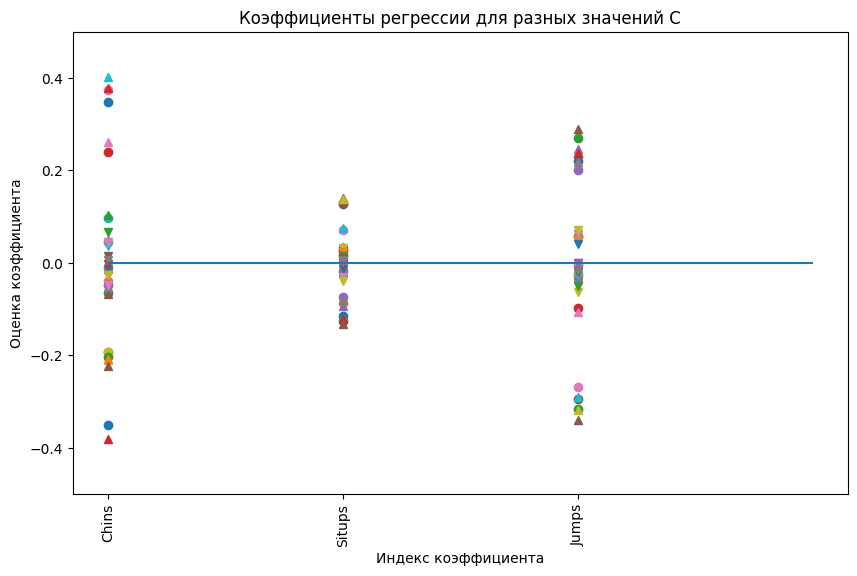

In [123]:
# Создаем фигуру для графика с заданным размером
plt.figure(figsize=(10, 6))

# Строим графики коэффициентов регрессии для разных значений C
# logreg.coef_.T - коэффициенты регрессии для модели с C=1
# logreg100.coef_.T - коэффициенты регрессии для модели с C=100
# logreg001.coef_.T - коэффициенты регрессии для модели с C=0.001
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

# Устанавливаем метки по оси x, чтобы отобразить имена признаков
plt.xticks(range(linnerud.data.shape[1]), linnerud.feature_names, rotation=90)

# Рисуем горизонтальные линии на уровне 0 для наглядности
plt.hlines(0, 0, linnerud.data.shape[1])

# Устанавливаем ограничения для оси y
plt.ylim(-0.5, 0.5)

# Добавляем подписи к осям и заголовок графика
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.title("Коэффициенты регрессии для разных значений C")

# Отображаем график
plt.show()

### Выводы

In [ ]:
# при изменении коэффицента регуляризации alpha гребневой регрессии результаты обучения нашей модели никак не меняются, а даже ухудшается(тестовый набор)
# то же самое происходит и с регрессией лассо, меняем alpha, обучение модели никак не улучшается
# а вот при применении Logistic Regression и изменении регуляризации C, наша модель хорошо обучается при высококом значении C 
# (а вот тестовый набор никак не меняется и в каждом из регрессий получаем 0 как бы мы не меняли коэффицент регуляризации)